<a href="https://colab.research.google.com/github/karkhotin/fruit-leaf-models-leaf-disease-app/blob/main/Evaluate_the_leaf_detector_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip PlantDoc-416x416.zip -d /content/

Показано результат, скорочений до останніх рядків (5000).
  inflating: /content/__MACOSX/PlantDoc-416x416/train/images/._Corn020Fig2_jpg.rf.e20395ed387463bfd11f0c455f6e15a5.jpg  
  inflating: /content/PlantDoc-416x416/train/images/bacterialspot3_600px_jpg.rf.dddffc038908587dfac42d3fa1060951.jpg  
  inflating: /content/__MACOSX/PlantDoc-416x416/train/images/._bacterialspot3_600px_jpg.rf.dddffc038908587dfac42d3fa1060951.jpg  
  inflating: /content/PlantDoc-416x416/train/images/P1110947+Rubus+idaeus+fr+St_+Joe+River_JPG_jpg.rf.b56bda7c1f411037e3f6f9b2b4b2e44d.jpg  
  inflating: /content/__MACOSX/PlantDoc-416x416/train/images/._P1110947+Rubus+idaeus+fr+St_+Joe+River_JPG_jpg.rf.b56bda7c1f411037e3f6f9b2b4b2e44d.jpg  
  inflating: /content/PlantDoc-416x416/train/images/apple-scab-leaf-big_jpg.rf.f7be8031b2ded242357b6d249a3b2a5f.jpg  
  inflating: /content/__MACOSX/PlantDoc-416x416/train/images/._apple-scab-leaf-big_jpg.rf.f7be8031b2ded242357b6d249a3b2a5f.jpg  
  inflating: /content/PlantDoc-4

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 15.5 MB/s eta 0:00:00


# Validation and metrics of an acceptable model

---



In [ ]:

# Load a model

model = YOLO("/content/drive/MyDrive/Dataset/runs_backup/detect/yolov8_single_orig/weights/best.pt")

# Validate the model
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]
val: Scanning /content/PlantDoc/test/labels... 239 images, 1 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<00:00, 1198.97it/s]

val: New cache created: /content/PlantDoc/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [04:31<00:00, 18.08s/it]


                   all        239        454      0.856      0.861      0.921      0.701
Speed: 2.5ms preprocess, 1124.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val


array([    0.70053])

In [ ]:
print(metrics.box.map)  # map50-95
print(metrics.box.map50 ) # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps)

0.7005270774710661
0.9210371450030229
0.7798116810407715
[    0.70053]


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import requests
from PIL import Image
from io import BytesIO

# Try different image for testing
# url = "https://hvost.news/upload/medialibrary/f1b/9_pravil_osennikh_progulok_s_sobakoy_.jpg"
# url_ = "https://storage.needpix.com/rsynced_images/apple-2828840_1280.jpg"
# url__ = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-uYUyPv7r0vzwsnIs6Offtp0yIlyVPSqLGQ&s"
# url = "https://www.brixandcolumns.com/wp-content/uploads/2020/11/20200915_0934411-1030x773.jpg"

url = "https://i.redd.it/help-me-fix-my-apple-tree-v0-p3a5qxvpuvbd1.jpg?width=3000&format=pjpg&auto=webp&s=881321853c92606e12f89305efe9166730c8c6bd"



response = requests.get(url)
image = Image.open(BytesIO(response.content))
image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)


0: 416x320 4 Leafs, 553.3ms
Speed: 4.8ms preprocess, 553.3ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 320)


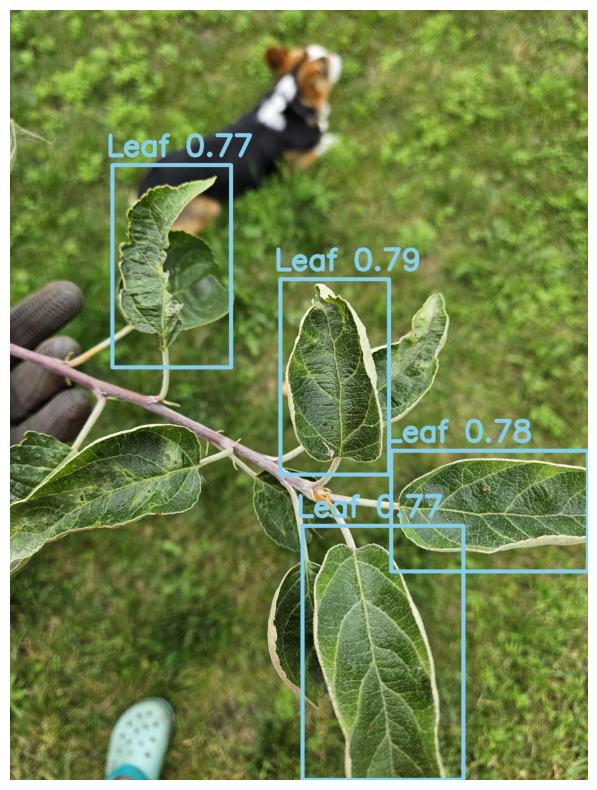

In [ ]:
img_res = model.predict(source=image, conf=0.5)

plt.figure(figsize=(10, 10))

for result in img_res:
    boxes = result.boxes  # Get the detected boxes
    if boxes is not None:
        for i, box in enumerate(boxes.xyxy):
            if len(box) == 4:
                x1, y1, x2, y2 = box
                conf = result.boxes.conf[i]
                cls = result.boxes.cls[i]
                x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
                label = f"{model.names[int(cls)]} {conf:.2f}"
                cv2.rectangle(image, (x1, y1), (x2, y2), (135, 206, 235), 20)
                cv2.putText(image, label, (x1-30, y1 - 50), cv2.FONT_HERSHEY_SIMPLEX, 5, (135, 206, 235), 20)

plt.imshow(image)
plt.axis('off')
plt.show()